In [1]:
#!pip install pip==21.3.1
#!pip install prophet
#!pip install pystan==2.19
#!pip install fbprophet

In [2]:
from platform import python_version
print(python_version())

3.6.7


In [4]:
import pandas as pd
#from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('POMO_dataset/Historical Weather Data 2010-2021_preprocessed_2.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,...,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora,NewLabel
0,2010-01-01,1,1,2010,20,30,20,23,42,33,...,6.91,7.18,1709.0,0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,...,6.77,7.66,1707.0,1,1,1,0,0,0,24
2,2010-01-03,3,1,2010,24,27,21,24,61,50,...,6.76,7.44,1707.0,0,0,0,0,0,0,0
3,2010-01-04,4,1,2010,23,29,20,24,57,30,...,7.10,7.43,1708.0,0,0,0,0,0,0,0
4,2010-01-05,5,1,2010,22,30,21,24,48,34,...,6.53,8.05,1709.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,2021-11-27,27,11,2021,21,32,27,26,56,35,...,7.17,7.69,1707.0,1,1,0,0,0,0,16
4174,2021-11-28,28,11,2021,21,31,26,26,58,32,...,7.46,8.22,1709.0,1,1,0,0,0,0,16
4175,2021-11-29,29,11,2021,17,26,24,22,49,29,...,7.38,7.92,1709.0,0,0,0,0,0,0,0
4176,2021-11-30,30,11,2021,17,27,22,22,52,41,...,7.01,7.16,1630.2,0,0,0,0,0,0,0


In [6]:
col_list = ['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 
            'pressureMB_avg', 'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure']

In [7]:
# col_list = ['observation','tempC_avg(0C)', 'Relative humidity_avg(%)', 
#             'windspeedKmph_avg(Km/h)', 'pressureMB_avg', 'precipMM_avg(mm)', 
#             'weatherDesc', 'Sunshine Hours', '%_soil_moisure']
# df1 = df[col_list]

# start_index = 4000
# end_index = start_index + 30
# df1 = df1.iloc[start_index:end_index]
# df1.to_csv('sample14.csv', index=False)
# df1.head()


In [8]:
df = df[["observation","tempC_avg(0C)"]]
df.head()

,observation,tempC_avg(0C)
0,2010-01-01,23
1,2010-01-02,25
2,2010-01-03,24
3,2010-01-04,24
4,2010-01-05,24


In [9]:
# Change Column Names for FB Prophet
df.columns = ['ds','y']

In [10]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
4173,2021-11-27,26
4174,2021-11-28,26
4175,2021-11-29,22
4176,2021-11-30,22
4177,2021-12-01,17


<AxesSubplot:xlabel='ds'>

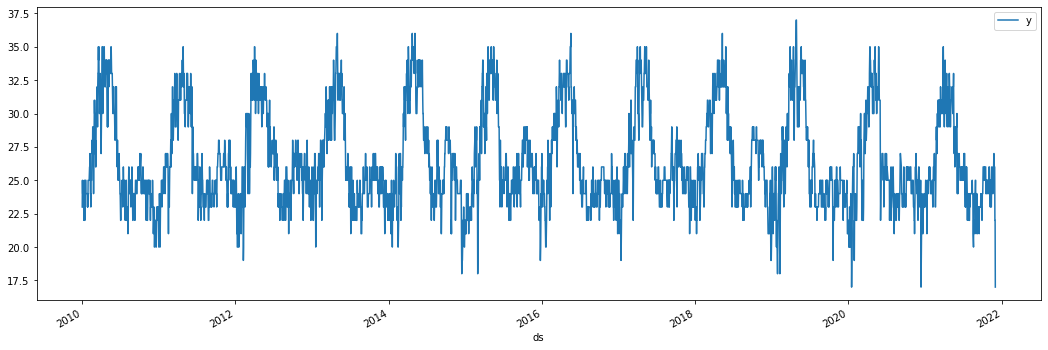

In [11]:
# Plot Your Data
df.plot(x='ds',y='y',figsize=(18,6))

In [12]:
len(df) 

4178

In [13]:
# 3517 + 350, 67-14

In [14]:
df1 = df.iloc[2461:]
df1.reset_index(drop=True, inplace=True)
df1

,ds,y
0,2017-01-01,25
1,2017-01-02,24
2,2017-01-03,21
3,2017-01-04,23
4,2017-01-05,24
...,...,...
1712,2021-11-27,26
1713,2021-11-28,26
1714,2021-11-29,22
1715,2021-11-30,22


In [15]:
df = df1

In [16]:
# Train, Test Split
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [17]:
# Start Making Predictions
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
...,...
1712,2021-11-14
1713,2021-11-15
1714,2021-11-16
1715,2021-11-17


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1712,2021-11-14,25.060326,21.744914,26.094344,24.897795,25.228480,-1.110712,-1.110712,-1.110712,0.107306,0.107306,0.107306,-1.218018,-1.218018,-1.218018,0.0,0.0,0.0,23.949614
1713,2021-11-15,25.059037,21.908657,26.119523,24.896119,25.227626,-1.163903,-1.163903,-1.163903,0.040432,0.040432,0.040432,-1.204335,-1.204335,-1.204335,0.0,0.0,0.0,23.895133
1714,2021-11-16,25.057747,21.775307,25.901645,24.894268,25.226771,-1.153654,-1.153654,-1.153654,0.039307,0.039307,0.039307,-1.192961,-1.192961,-1.192961,0.0,0.0,0.0,23.904093
1715,2021-11-17,25.056457,21.819187,25.936562,24.892021,25.226016,-1.145923,-1.145923,-1.145923,0.038842,0.038842,0.038842,-1.184765,-1.184765,-1.184765,0.0,0.0,0.0,23.910535
1716,2021-11-18,25.055168,21.552122,26.173167,24.890186,25.225471,-1.268788,-1.268788,-1.268788,-0.088208,-0.088208,-0.088208,-1.180580,-1.180580,-1.180580,0.0,0.0,0.0,23.786380


In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1712,2021-11-14,23.949614,21.744914,26.094344
1713,2021-11-15,23.895133,21.908657,26.119523
1714,2021-11-16,23.904093,21.775307,25.901645
1715,2021-11-17,23.910535,21.819187,25.936562
1716,2021-11-18,23.786380,21.552122,26.173167


In [21]:
test.tail()

,ds,y
1712,2021-11-27,26
1713,2021-11-28,26
1714,2021-11-29,22
1715,2021-11-30,22
1716,2021-12-01,17


In [23]:
# USING BUILT-IN FB PROPHET VISUALIZATION
#plot_plotly(m ,forecast)

In [24]:
future = m.make_future_dataframe(periods=60) #MS for monthly, H for hourly
forecast = m.predict(future)

In [25]:
#plot_plotly(m ,forecast)

In [26]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2017-01-01,22.701049
1,2017-01-02,22.691403
2,2017-01-03,22.751656
3,2017-01-04,22.815378
4,2017-01-05,22.753988
...,...,...
1407,2021-01-13,22.169524
1408,2021-01-14,22.074653
1409,2021-01-15,22.063118
1410,2021-01-16,22.200937


In [27]:
future = m.make_future_dataframe(periods=120) #MS for monthly, H for hourly
future = future[30:]

forecast = m.predict(future)

In [28]:
#plot_plotly(m ,forecast)

In [30]:
#plot_components_plotly(m, forecast)

In [31]:
future

,ds
30,2017-02-01
31,2017-02-02
32,2017-02-03
33,2017-02-04
34,2017-02-05
...,...
1467,2021-03-14
1468,2021-03-15
1469,2021-03-16
1470,2021-03-17


In [32]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-02-01,26.629620,21.817392,26.232790,26.629620,26.629620,-2.528830,-2.528830,-2.528830,0.038842,0.038842,0.038842,-2.567673,-2.567673,-2.567673,0.0,0.0,0.0,24.100790
1,2017-02-02,26.630699,21.996641,26.107742,26.630699,26.630699,-2.531910,-2.531910,-2.531910,-0.088208,-0.088208,-0.088208,-2.443701,-2.443701,-2.443701,0.0,0.0,0.0,24.098789
2,2017-02-03,26.631779,21.859335,26.362237,26.631779,26.631779,-2.433038,-2.433038,-2.433038,-0.126681,-0.126681,-0.126681,-2.306357,-2.306357,-2.306357,0.0,0.0,0.0,24.198741
3,2017-02-04,26.632858,22.340699,26.588916,26.632858,26.632858,-2.167234,-2.167234,-2.167234,-0.010998,-0.010998,-0.010998,-2.156235,-2.156235,-2.156235,0.0,0.0,0.0,24.465624
4,2017-02-05,26.633938,22.652501,26.900422,26.633938,26.633938,-1.886934,-1.886934,-1.886934,0.107306,0.107306,0.107306,-1.994241,-1.994241,-1.994241,0.0,0.0,0.0,24.747003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,2021-03-14,25.376282,24.554167,28.840435,25.344483,25.406026,1.312579,1.312579,1.312579,0.107306,0.107306,0.107306,1.205272,1.205272,1.205272,0.0,0.0,0.0,26.688861
1438,2021-03-15,25.374992,24.470057,28.890466,25.342349,25.405213,1.391585,1.391585,1.391585,0.040432,0.040432,0.040432,1.351153,1.351153,1.351153,0.0,0.0,0.0,26.766577
1439,2021-03-16,25.373703,24.778702,29.079337,25.340728,25.404440,1.559225,1.559225,1.559225,0.039307,0.039307,0.039307,1.519917,1.519917,1.519917,0.0,0.0,0.0,26.932927
1440,2021-03-17,25.372413,24.905198,29.202927,25.338932,25.403667,1.749693,1.749693,1.749693,0.038842,0.038842,0.038842,1.710850,1.710850,1.710850,0.0,0.0,0.0,27.122106


In [33]:
m

In [34]:
# https://stackoverflow.com/questions/28268818/how-to-find-the-date-n-days-ago-in-python
# Current Date:
import datetime
Current_Date = datetime.datetime.today()
print(Current_Date.date())

2023-01-20


In [35]:
# Previous Date:
Previous_Date = datetime.datetime.today() - datetime.timedelta(days=1) #n=1
print (Previous_Date.date())

2023-01-19


In [36]:
# Next-Day Date:
NextDay_Date = datetime.datetime.today() + datetime.timedelta(days=1)
print (NextDay_Date.date())

2023-01-21


In [37]:
for day in range(1, 31):
  NextDay_Date = datetime.datetime.today() + datetime.timedelta(days=day)
  print (NextDay_Date.date())

2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11
2023-02-12
2023-02-13
2023-02-14
2023-02-15
2023-02-16
2023-02-17
2023-02-18
2023-02-19


In [38]:
next_days = [(datetime.datetime.today().date() + datetime.timedelta(days=day)) for day in range(1, 31)]
print(next_days)

[datetime.date(2023, 1, 21), datetime.date(2023, 1, 22), datetime.date(2023, 1, 23), datetime.date(2023, 1, 24), datetime.date(2023, 1, 25), datetime.date(2023, 1, 26), datetime.date(2023, 1, 27), datetime.date(2023, 1, 28), datetime.date(2023, 1, 29), datetime.date(2023, 1, 30), datetime.date(2023, 1, 31), datetime.date(2023, 2, 1), datetime.date(2023, 2, 2), datetime.date(2023, 2, 3), datetime.date(2023, 2, 4), datetime.date(2023, 2, 5), datetime.date(2023, 2, 6), datetime.date(2023, 2, 7), datetime.date(2023, 2, 8), datetime.date(2023, 2, 9), datetime.date(2023, 2, 10), datetime.date(2023, 2, 11), datetime.date(2023, 2, 12), datetime.date(2023, 2, 13), datetime.date(2023, 2, 14), datetime.date(2023, 2, 15), datetime.date(2023, 2, 16), datetime.date(2023, 2, 17), datetime.date(2023, 2, 18), datetime.date(2023, 2, 19)]


In [39]:
next_days[0]

datetime.date(2023, 1, 21)

In [40]:
next_df = pd.DataFrame(next_days, columns=['ds'])
next_df

,ds
0,2023-01-21
1,2023-01-22
2,2023-01-23
3,2023-01-24
4,2023-01-25
5,2023-01-26
6,2023-01-27
7,2023-01-28
8,2023-01-29
9,2023-01-30


In [41]:
forecast = m.predict(next_df)

In [42]:
forecast[['ds','yhat']]

,ds,yhat
0,2023-01-21,21.321692
1,2023-01-22,21.452826
2,2023-01-23,21.401473
3,2023-01-24,21.420134
4,2023-01-25,21.445293
5,2023-01-26,21.351246
6,2023-01-27,21.354614
7,2023-01-28,21.522307
8,2023-01-29,21.703962
9,2023-01-30,21.712743


In [43]:
import pickle

# save the model to disk
filename = f'temp_pro.pkl'
# filename = re.sub('\W+','_', filename )+'.pkl'
pickle.dump(m, open(filename, 'wb'))
print(f'File saved : {filename}')


TypeError: can't pickle _thread.RLock objects

In [44]:
import re

def model_build_and_train(df, col_name):
  print(f"{col_name}")

  df = df[["observation",f"{col_name}"]]

  # Change Column Names for FB Prophet
  df.columns = ['ds','y']

  # Change cloumns datatype to datetime
  df['ds'] = pd.to_datetime(df['ds'])

  # display
  display(df.head())

  # Plot Your Data
  df.plot(x='ds',y='y',figsize=(18,6))
  plt.show()

  # Select data range  
  df1 = df.iloc[2461:]
  df1.reset_index(drop=True, inplace=True)
  df = df1

  # Train, Test Split
  train = df.iloc[:len(df)-365]
  test = df.iloc[len(df)-365:]

  # Start Making Predictions
  m = Prophet()
  m.fit(train)
  future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
  forecast = m.predict(future)

  # display
  display(forecast[['ds', 'yhat']].head())

  # save the model to disk
  filename = f'{col_name}_pro'
  filename = re.sub('\W+','_', filename )+'.pkl'
  pickle.dump(m, open(filename, 'wb'))
  print(f'File saved : {filename}')


  return m, forecast

  

tempC_avg(0C)


c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2010-01-01,23
1,2010-01-02,25
2,2010-01-03,24
3,2010-01-04,24
4,2010-01-05,24


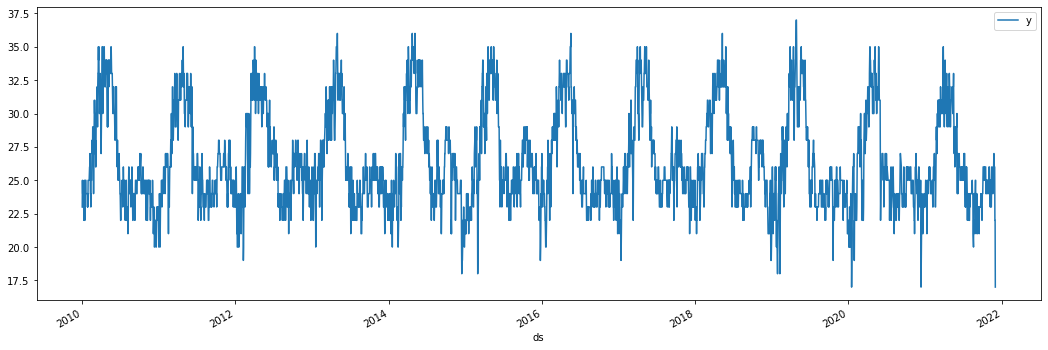

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2017-01-01,22.701049
1,2017-01-02,22.691403
2,2017-01-03,22.751656
3,2017-01-04,22.815378
4,2017-01-05,22.753988


TypeError: can't pickle _thread.RLock objects

In [45]:
df = pd.read_csv('POMO_dataset/Historical Weather Data 2010-2021_preprocessed_2.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

col_list = ['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 
            'pressureMB_avg', 'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure']
for col_name in col_list:
  m ,forecast = model_build_and_train(df, col_name)
  print(f"m : {m}")
  
  next_days = [(datetime.datetime.today().date() + datetime.timedelta(days=day)) for day in range(1, 31)]
  next_df = pd.DataFrame(next_days, columns=['ds'])
  forecast = m.predict(next_df)

  # display
  display(forecast[['ds', 'yhat']].head())
  
  # # USING BUILT-IN FB PROPHET VISUALIZATION
  # plot_plotly(m ,forecast)
  # plt.show()

  # plot_components_plotly(m, forecast)
  # plt.show()

,ds,yhat
0,2023-01-19,21.157716
1,2023-01-20,21.131041
2,2023-01-21,21.258256
3,2023-01-22,21.389356
4,2023-01-23,21.337944


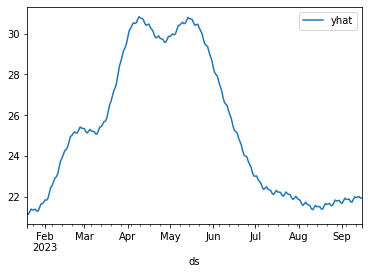

,ds,yhat
0,2023-01-19,28.362502
1,2023-01-20,28.447488
2,2023-01-21,27.795768
3,2023-01-22,27.661904
4,2023-01-23,27.270684


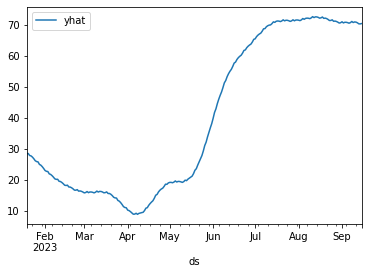

,ds,yhat
0,2023-01-19,4.111300
1,2023-01-20,4.239093
2,2023-01-21,4.155198
3,2023-01-22,4.358804
4,2023-01-23,4.427687


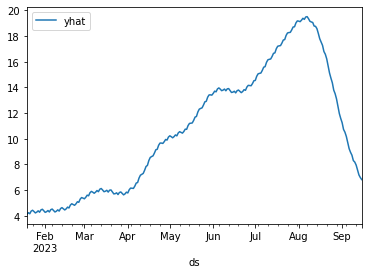

,ds,yhat
0,2023-01-19,1017.445241
1,2023-01-20,1017.495153
2,2023-01-21,1017.606469
3,2023-01-22,1017.754999
4,2023-01-23,1017.669014


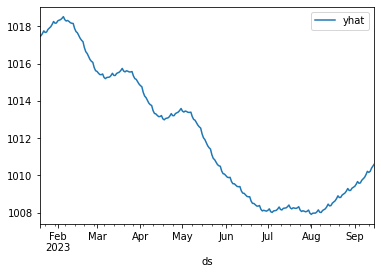

,ds,yhat
0,2023-01-19,0.302036
1,2023-01-20,0.263020
2,2023-01-21,0.319412
3,2023-01-22,0.279728
4,2023-01-23,0.280102


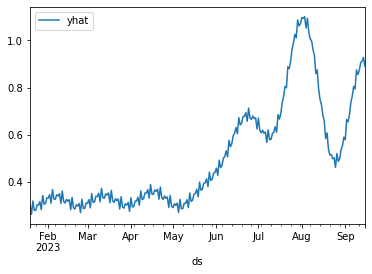

,ds,yhat
0,2023-01-19,4.149074
1,2023-01-20,4.161070
2,2023-01-21,4.137067
3,2023-01-22,4.148891
4,2023-01-23,4.133134


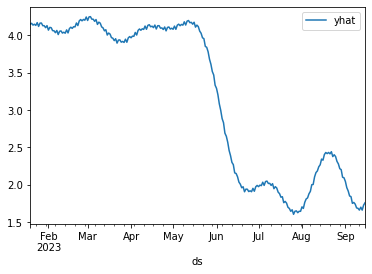

,ds,yhat
0,2023-01-19,9.786468
1,2023-01-20,9.844866
2,2023-01-21,9.830179
3,2023-01-22,9.879452
4,2023-01-23,9.919151


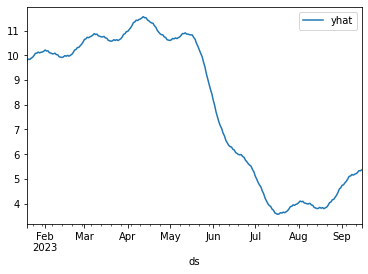

,ds,yhat
0,2023-01-19,49.441558
1,2023-01-20,49.074209
2,2023-01-21,49.285008
3,2023-01-22,49.052586
4,2023-01-23,49.304798


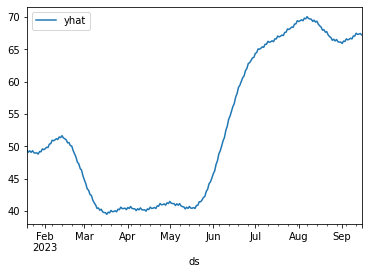

In [ ]:
next_days = [(datetime.datetime.today().date() + datetime.timedelta(days=day)) for day in range(1, 241)]
next_df = pd.DataFrame(next_days, columns=['ds'])
# forecast = m.predict(next_df)

# m_path = "/content/Relative_humidity_avg__pro.pkl"
# m_path = "/content/Sunshine_Hours_pro.pkl"
# m_path = "/content/__soil_moisure_pro.pkl"
# m_path = "/content/precipMM_avg_mm__pro.pkl"
# m_path = "/content/pressureMB_avg_pro.pkl"
# m_path = "/content/tempC_avg_0C__pro.pkl"
# m_path = "/content/weatherDesc_pro.pkl"
# m_path = "/content/windspeedKmph_avg_Km_h__pro.pkl"

model_path_list = ["/content/tempC_avg_0C__pro.pkl", 
                   "/content/Relative_humidity_avg__pro.pkl", 
                   "/content/windspeedKmph_avg_Km_h__pro.pkl",
                   "/content/pressureMB_avg_pro.pkl", 
                   "/content/precipMM_avg_mm__pro.pkl", 
                   "/content/weatherDesc_pro.pkl", 
                   "/content/Sunshine_Hours_pro.pkl", 
                   "/content/__soil_moisure_pro.pkl"
                   ]

col_yhat_out = []

for m_path in model_path_list:
  model = pickle.load(open(m_path, 'rb')) 

  forecast = model.predict(next_df)

  # display
  df2 = forecast[['ds', 'yhat']]
  # df2['yhat'] = df2['yhat'].round(decimals=6)
  display(df2.head())

  df2.plot(x='ds', y='yhat')
  plt.show()

  col_yhat_out.append(list(forecast['yhat']))

In [ ]:
data = [next_days] + col_yhat_out

df3 = pd.DataFrame(data)
df3 = df3.T
# df3

col_list = ['observation','tempC_avg(0C)', 'Relative humidity_avg(%)', 
            'windspeedKmph_avg(Km/h)', 'pressureMB_avg', 'precipMM_avg(mm)', 
            'weatherDesc', 'Sunshine Hours', '%_soil_moisure']
#rename all column names
df3.columns = col_list 
# convert columns to int64 dtype 
df3 = df3.astype({"tempC_avg(0C)": int, "Relative humidity_avg(%)": int, 
                "windspeedKmph_avg(Km/h)": int, "pressureMB_avg": int,
                "weatherDesc": int, "%_soil_moisure": int})
df3

,observation,tempC_avg(0C),Relative humidity_avg(%),windspeedKmph_avg(Km/h),pressureMB_avg,precipMM_avg(mm),weatherDesc,Sunshine Hours,%_soil_moisure
0,2023-01-19,21,28,4,1017,0.302036,4,9.786468,49
1,2023-01-20,21,28,4,1017,0.26302,4,9.844866,49
2,2023-01-21,21,27,4,1017,0.319412,4,9.830179,49
3,2023-01-22,21,27,4,1017,0.279728,4,9.879452,49
4,2023-01-23,21,27,4,1017,0.280102,4,9.919151,49
...,...,...,...,...,...,...,...,...,...
235,2023-09-11,21,70,7,1010,0.871792,1,5.212339,67
236,2023-09-12,21,70,7,1010,0.905807,1,5.261757,67
237,2023-09-13,22,70,7,1010,0.911295,1,5.334691,67
238,2023-09-14,21,70,6,1010,0.928229,1,5.325103,67


In [2]:
import datetime
import pandas as pd

In [3]:
df = pd.read_csv('/content/sample.csv')
df['observation'].iloc[-1]

'2012-12-06'

In [6]:
datetime.datetime.strptime(df['observation'].iloc[-1], '%Y-%m-%d').date()

datetime.date(2012, 12, 6)